In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GaussianNoise
from keras.optimizers import Adam 

## ALSO ADD NOISE LAYER 
## ALSO DRAW ERROR/LOSS * ACCURACY

2023-09-20 15:13:26.057775: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 15:13:26.093818: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 15:13:26.094487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 15:13:26.734272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
num_threads = 5
os.environ["OMP_NUM_THREADS"] = "5"
os.environ["TF_NUM_INTRAOP_THREADS"] = "5"
os.environ["TF_NUM_INTEROP_THREADS"] = "5"
tf.config.threading.set_inter_op_parallelism_threads(num_threads)
tf.config.threading.set_intra_op_parallelism_threads(num_threads)
tf.config.set_soft_device_placement(True)

In [3]:
dataset_train = pd.read_csv('/home/tina/Downloads/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [5]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [8]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape, y_train.shape

((1975, 60), (1975,))

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
unit_count = 100

model = Sequential()
model.add(LSTM(units = unit_count, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# model.add(GaussianNoise(0.1, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=unit_count, return_sequences=True))
model.add(Dropout(0.2))
model.add(GaussianNoise(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(units=unit_count))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_16 (LSTM)              (None, 60, 100)           80400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 100)           0         
                                                                 
 gaussian_noise_4 (Gaussian  (None, 60, 100)           0         
 Noise)                                                          
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                      

In [38]:
optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 7s 57ms/step - loss: 0.0082
Epoch 2/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0035
Epoch 4/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 4s 56ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0024
Epoch 9/100
62/62 [==============================] - 3s 56ms/step - loss: 0.0023
Epoch 10/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 3s 56ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 4s 57ms/step - loss: 0.0020
Epoch 13/100
62/62 [=====

In [39]:
dataset_test = pd.read_csv('/home/tina/Downloads/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [40]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [42]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 682ms/step


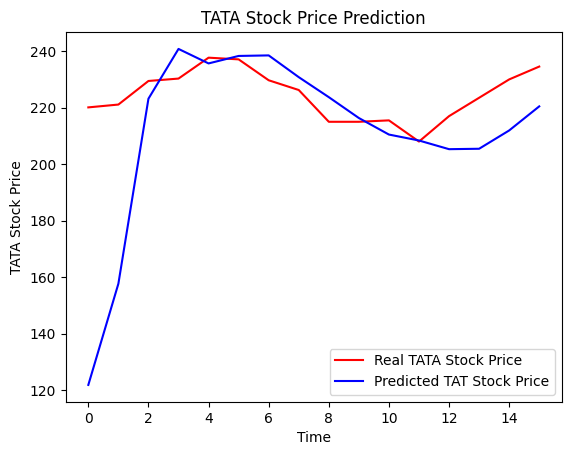

In [43]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

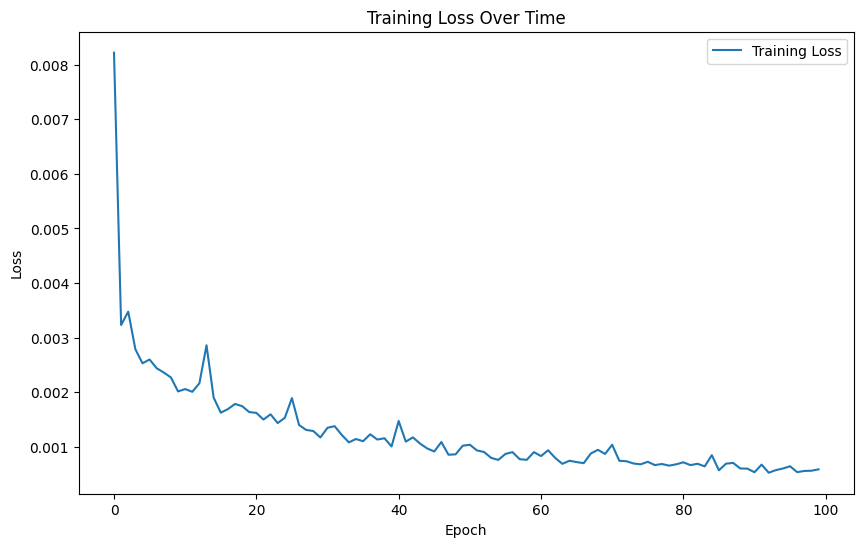

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

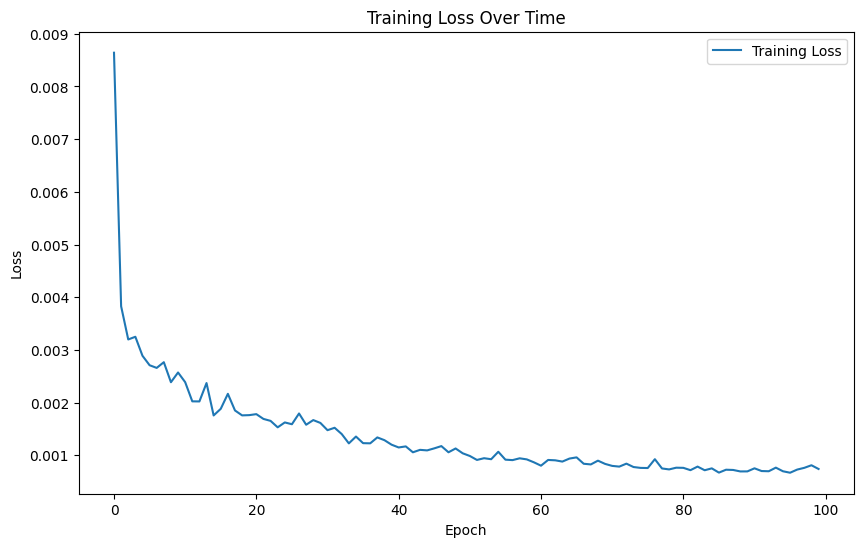

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()